In [30]:
import os,sys
sys.path.append(os.path.abspath('../'))
from first_analytics import *
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore annoying warning messages
import logging
logging.basicConfig(level=logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

In [36]:
def load_from_db():
    df=read_to_df()
    df=to_numeric(df)
    return df
df=load_from_db()

In [53]:
def agg_df(df,region,property_type=None,bed=None):
    """Rudimentary analytics to calculate aggregated metrics"""
    df=df[df["region"].str.contains(region, na=False)]
    if property_type:
        df=df[df["property_type"].str.contains(property_type, na=False)]
    
    df=df[df["pricetype"].str.contains("sold", na=False)]
    if bed:
        df=df[df["bed"]==bed]

    # Shows the mean + frequency + other aggregations of properties per frequency specified
    metrics=['prices','landsize','buildingsize']
    dimensions=['mean','median','std']
    agg_dict={'address':'count'}
    for item in metrics:
        for d in dimensions:
            agg_dict[item+"_"+d]=d
            df["%s_%s"%(item,d)]=df[item]

    df=df.resample('A', on='date').agg(agg_dict).rename(columns={'address':'freq'})
    
    df=df.fillna(method='bfill')
#     for item in metrics:
#         for d in dimensions:
#             print(item,d)
#             df["%s_%s"%(item,d)]=df["%s_%s"%(item,d)].apply(lambda x: '%.0f' % x)
    df['datestamp']=df.index

    return df

res=agg_df(df, region='Hurstville')
res


,freq,prices_mean,prices_median,prices_std,landsize_mean,landsize_median,landsize_std,buildingsize_mean,buildingsize_median,buildingsize_std,datestamp
date,,,,,,,,,,,
1982-12-31,4,1.050000e+05,105000.0,0.000000e+00,508.000000,508.0,0.000000,115.000000,115.0,164.159073,1982-12-31
1983-12-31,4,6.265625e+04,57875.0,9.562500e+03,558.750000,483.0,151.500000,115.000000,115.0,164.159073,1983-12-31
1984-12-31,2,6.585000e+04,65850.0,4.030509e+03,476.000000,476.0,7.071068,115.000000,115.0,164.159073,1984-12-31
1985-12-31,2,1.135000e+05,113500.0,2.192031e+04,672.500000,672.5,149.199524,115.000000,115.0,164.159073,1985-12-31
1986-12-31,2,1.317500e+05,131750.0,3.995154e+04,485.000000,485.0,50.911690,139.000000,139.0,164.159073,1986-12-31
1987-12-31,2,1.320000e+05,132000.0,2.404163e+04,537.000000,537.0,188.090408,139.000000,139.0,164.159073,1987-12-31
1988-12-31,3,1.763333e+05,190000.0,2.367136e+04,667.000000,655.0,20.784609,139.000000,139.0,164.159073,1988-12-31
1989-12-31,0,1.965833e+05,188500.0,5.428202e+04,554.416687,518.0,101.325272,139.000000,139.0,164.159073,1989-12-31
1990-12-31,0,1.965833e+05,188500.0,5.428202e+04,554.416687,518.0,101.325272,139.000000,139.0,164.159073,1990-12-31


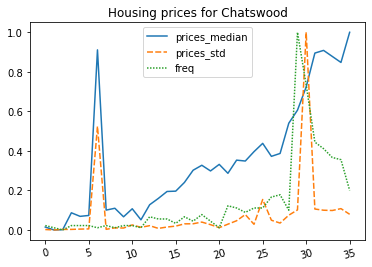

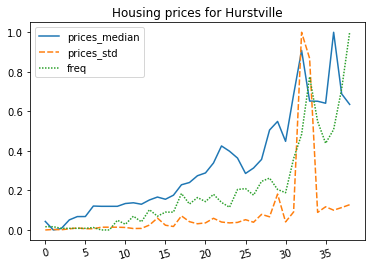

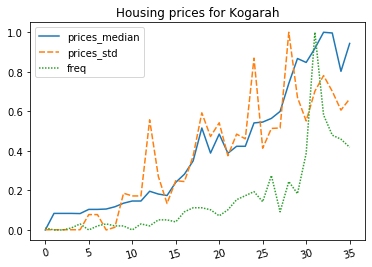

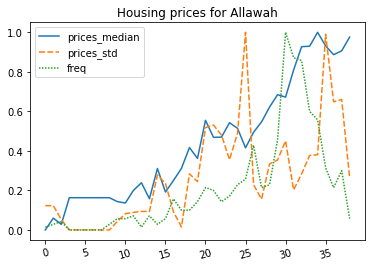

In [96]:
df=load_from_db()
from sklearn import preprocessing
import sklearn
# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
import time

def convert_to_timestamp(x):
    """Convert date objects to integers"""
    return time.mktime(x.to_datetime().timetuple())

def aggr_plot(suburb,cols=['prices_median','prices_std','freq'],property_type=None, normalize=True):
    agg=agg_df(df, region=suburb,property_type=property_type)
    min_max_scaler = preprocessing.MinMaxScaler()
    res=agg[cols]
    
    if normalize:
#         res['dates'] = pd.to_datetime(res.index)
#         res['dates'] = res['dates'].apply(convert_to_timestamp)
#         scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
#         dates_scaled = scaler.fit_transform(res['dates'])
        
        x_scaled = min_max_scaler.fit_transform(res)
        
        res=min_max_scaler.fit_transform(res)
        res = pd.DataFrame(res)
        res.columns=cols
        
    sns.lineplot(data=res)

    plt.xticks(rotation=15)
    plt.title(f'Housing prices for {suburb}')
    plt.show()
    
property_type=None
aggr_plot('Chatswood',property_type=property_type)
aggr_plot('Hurstville',property_type=property_type)
aggr_plot('Kogarah',property_type=property_type)
aggr_plot('Allawah',property_type=property_type)